In [1]:
# for data cleaning and processing
import numpy as np
import pandas as pd

# for drawing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:

df=pd.read_csv('Health Screening Data.csv')

df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Normal,40-50
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Obese,50-60
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Normal,50-60
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Overweight,40-50
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69924,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Overweight,50-60
69925,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Obese,60-70
69926,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Obese,50-60
69927,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Overweight,60-70


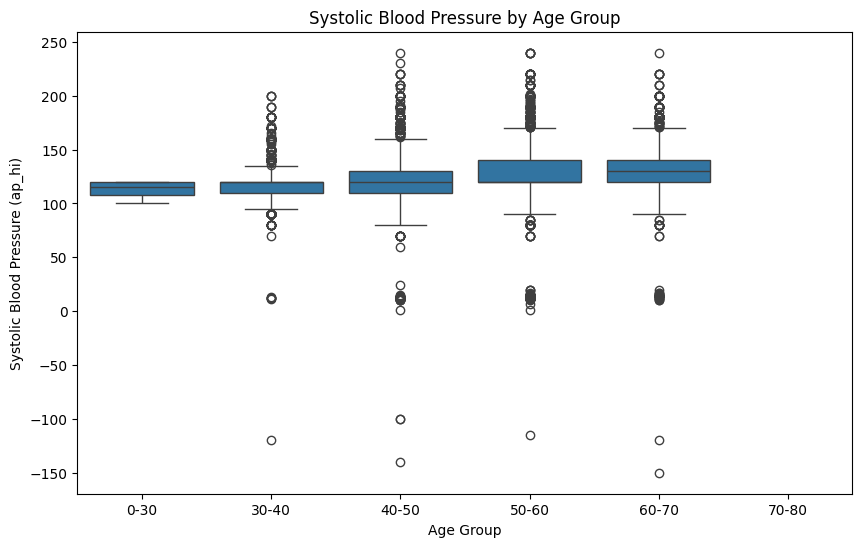

In [3]:
# Define the exact age groups as per your Excel file
age_order = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Set the order for age groups
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=age_order, ordered=True)

# Plotting Systolic Blood Pressure by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='ap_hi', data=df)
plt.title('Systolic Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.show()


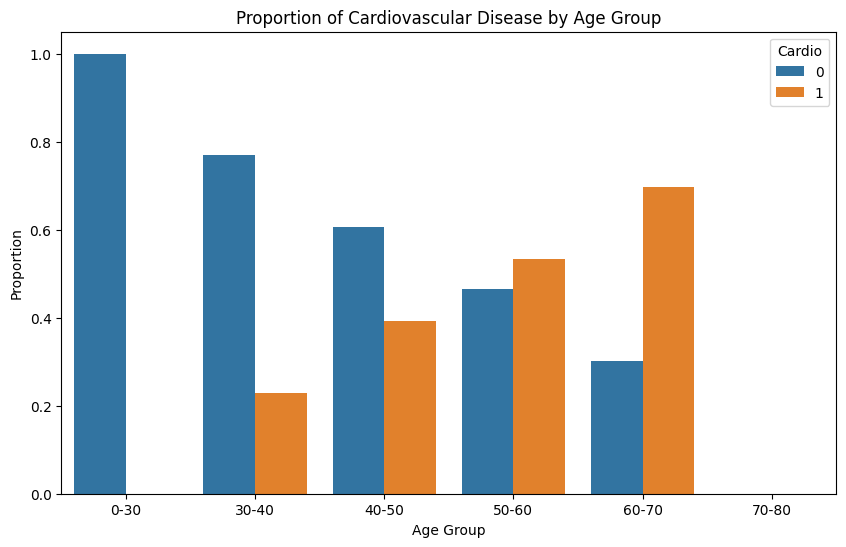

In [4]:
# Calculate proportions
age_cardio_proportion = df.groupby(['AgeGroup', 'cardio']).size().unstack().fillna(0)
age_cardio_proportion = age_cardio_proportion.div(age_cardio_proportion.sum(axis=1), axis=0)

# Melt the dataframe for seaborn
age_cardio_proportion = age_cardio_proportion.reset_index().melt(id_vars='AgeGroup', value_vars=[0, 1])
age_cardio_proportion.columns = ['AgeGroup', 'Cardio', 'Proportion']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Proportion', hue='Cardio', data=age_cardio_proportion, order=age_order)
plt.title('Proportion of Cardiovascular Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()


In [5]:
# Convert categorical variables
df['gender'] = df['gender'].map({1: 'Female', 2: 'Male'})
df['cholesterol'] = df['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['gluc'] = df['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['smoke'] = df['smoke'].map({0: 'Non-Smoker', 1: 'Smoker'})
df['alco'] = df['alco'].map({0: 'Non-Drinker', 1: 'Drinker'})
df['active'] = df['active'].map({0: 'Inactive', 1: 'Active'})

# Define a function to calculate proportions and plot
def plot_proportion(data, category, hue, title, xlabel):
    # Calculate proportions
    proportion = data.groupby([category, hue]).size().unstack().fillna(0)
    proportion = proportion.div(proportion.sum(axis=1), axis=0)

    # Melt the dataframe for seaborn
    proportion = proportion.reset_index().melt(id_vars=category, value_vars=[0, 1])
    proportion.columns = [category, 'Cardio', 'Proportion']

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Proportion', hue='Cardio', data=proportion, order=data[category].cat.categories if pd.api.types.is_categorical_dtype(data[category]) else None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.show()


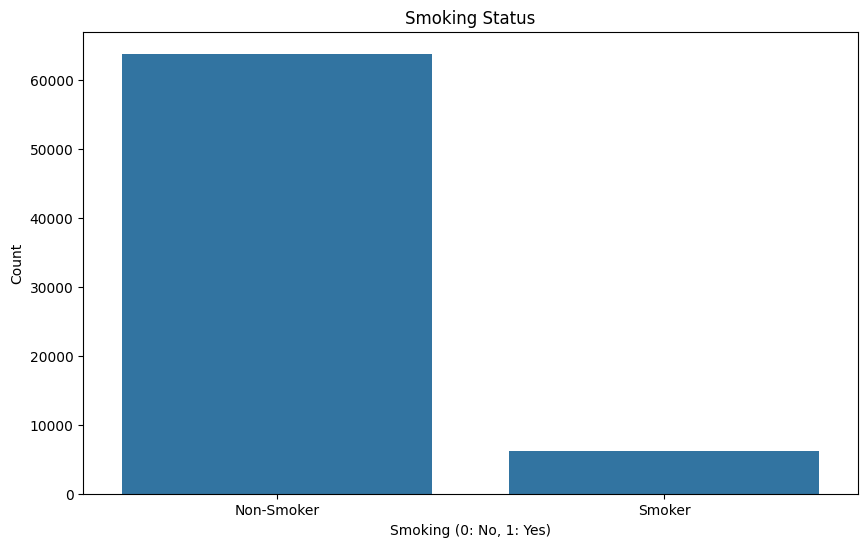

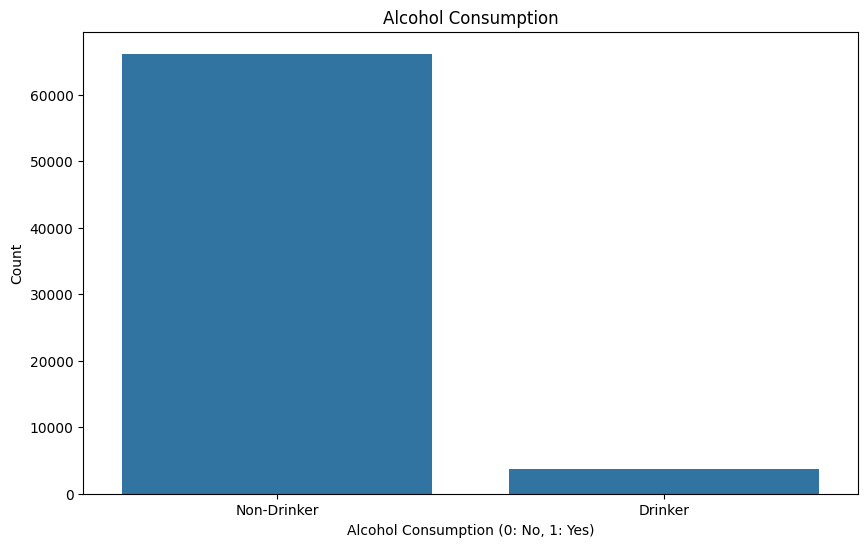

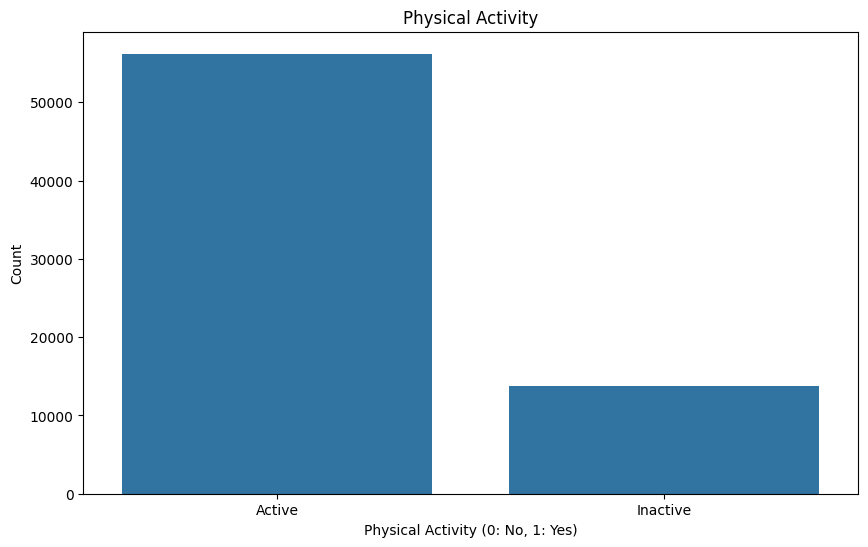

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to create count plots
def plot_count(data, category, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=category, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plotting smoking status, alcohol consumption, and physical activity using the function
plot_count(df, 'smoke', 'Smoking Status', 'Smoking (0: No, 1: Yes)', 'Count')
plot_count(df, 'alco', 'Alcohol Consumption', 'Alcohol Consumption (0: No, 1: Yes)', 'Count')
plot_count(df, 'active', 'Physical Activity', 'Physical Activity (0: No, 1: Yes)', 'Count')


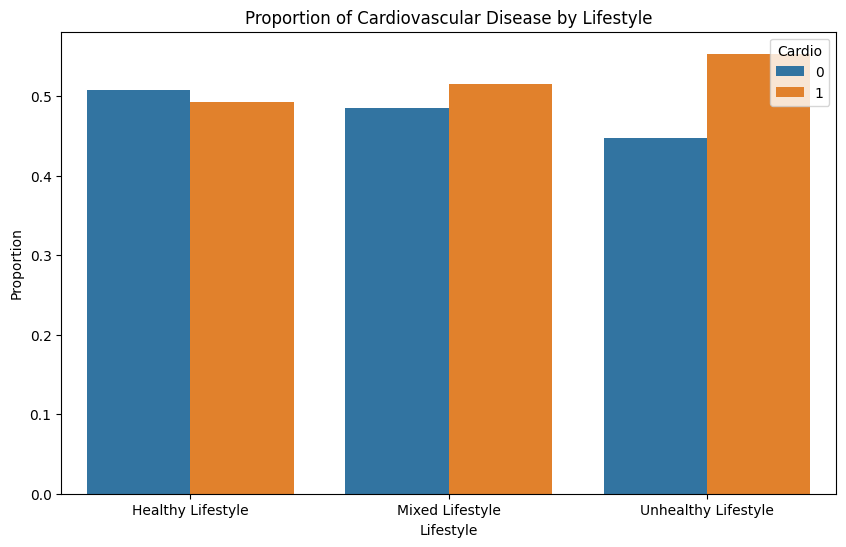

In [7]:
# Create a new column for lifestyle comparison
def categorize_lifestyle(row):
    if row['smoke'] == 'Non-Smoker' and row['alco'] == 'Non-Drinker' and row['active'] == 'Active':
        return 'Healthy Lifestyle'
    elif row['smoke'] == 'Smoker' and row['alco'] == 'Drinker' and row['active'] == 'Inactive':
        return 'Unhealthy Lifestyle'
    else:
        return 'Mixed Lifestyle'

df['Lifestyle'] = df.apply(categorize_lifestyle, axis=1)

# Define a function to calculate proportions and plot
def plot_proportion(data, category, hue, title, xlabel):
    # Calculate proportions
    proportion = data.groupby([category, hue]).size().unstack().fillna(0)
    proportion = proportion.div(proportion.sum(axis=1), axis=0)

    # Melt the dataframe for seaborn
    proportion = proportion.reset_index().melt(id_vars=category, value_vars=[0, 1])
    proportion.columns = [category, 'Cardio', 'Proportion']

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Proportion', hue='Cardio', data=proportion, order=data[category].cat.categories if pd.api.types.is_categorical_dtype(data[category]) else None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.show()

# Plot proportions for each category

plot_proportion(df, 'Lifestyle', 'cardio', 'Proportion of Cardiovascular Disease by Lifestyle', 'Lifestyle')

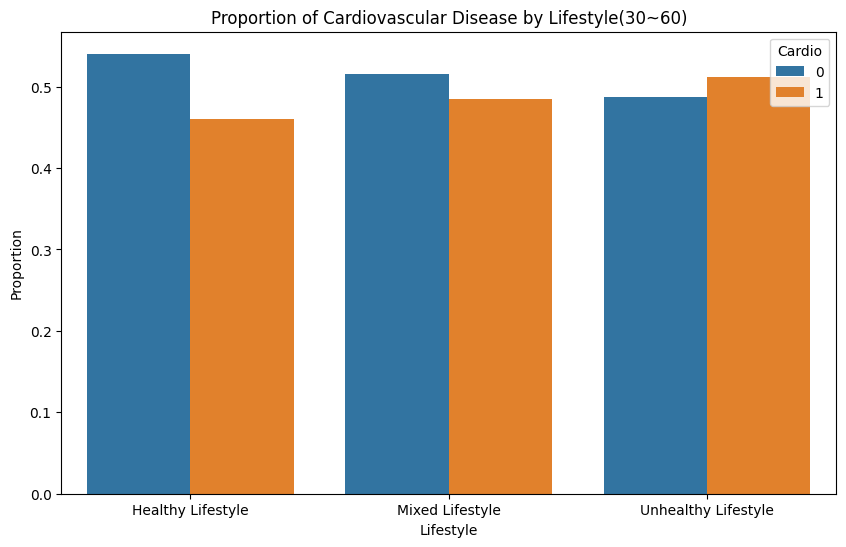

In [8]:
# Filter the DataFrame for individuals aged 30 to 60 years old
df = df[(df['AgeinYr'] >= 30) & (df['AgeinYr'] <= 60)]

# Create a new column for lifestyle comparison
def categorize_lifestyle(row):
    if row['smoke'] == 'Non-Smoker' and row['alco'] == 'Non-Drinker' and row['active'] == 'Active':
        return 'Healthy Lifestyle'
    elif row['smoke'] == 'Smoker' and row['alco'] == 'Drinker' and row['active'] == 'Inactive':
        return 'Unhealthy Lifestyle'
    else:
        return 'Mixed Lifestyle'

df['Lifestyle'] = df.apply(categorize_lifestyle, axis=1)

# Define a function to calculate proportions and plot
def plot_proportion(data, category, hue, title, xlabel):
    # Calculate proportions
    proportion = data.groupby([category, hue]).size().unstack().fillna(0)
    proportion = proportion.div(proportion.sum(axis=1), axis=0)

    # Melt the dataframe for seaborn
    proportion = proportion.reset_index().melt(id_vars=category, value_vars=[0, 1])
    proportion.columns = [category, 'Cardio', 'Proportion']

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Proportion', hue='Cardio', data=proportion, order=data[category].cat.categories if pd.api.types.is_categorical_dtype(data[category]) else None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.show()

# Plot proportions for each category

plot_proportion(df, 'Lifestyle', 'cardio', 'Proportion of Cardiovascular Disease by Lifestyle(30~60)', 'Lifestyle')

# 準備機器學習

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 20)
df = pd.read_csv("Health Screening Data.csv")
df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Normal,40-50
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Obese,50-60
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Normal,50-60
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Overweight,40-50
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69924,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Overweight,50-60
69925,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Obese,60-70
69926,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Obese,50-60
69927,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Overweight,60-70


In [10]:
df2 = df.copy()



def classify_bp(row):
    ap_hi = row['ap_hi']
    ap_lo = row['ap_lo']
    
    if ap_hi < 90 or ap_lo < 60:
        return '低血壓'
    elif ap_hi < 120 and ap_lo < 80:
        return '正常'
    elif (120 <= ap_hi <= 139 or 80 <= ap_lo <= 89) or (ap_hi >= 140 or ap_lo >= 90):
        return '高血壓'
    else:
        return '未知'

def cholesterol_status(row):
    cholesterol = row['cholesterol']

    if cholesterol == 1:
        return '正常'
    elif cholesterol in [2, 3]:
        return '偏高'
    else:
        return '未知'

def glucose_status(row):
    gluc = row['gluc']

    if gluc == 1:
        return '正常'
    elif gluc in [2, 3]:
        return '高血糖'
    else:
        return '未知'
    
df2['bp_status'] = df2.apply(classify_bp, axis=1)
df2['cholesterol_status'] = df2.apply(cholesterol_status, axis=1)
df2['glucose_status'] = df2.apply(glucose_status, axis=1)
df2


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,...,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,bp_status,cholesterol_status,glucose_status
0,0,0,18393,2,168,62.0,110,80,1,1,...,0,1,0,50,21.967120,Normal,40-50,高血壓,正常,正常
1,1,1,20228,1,156,85.0,140,90,3,1,...,0,1,1,55,34.927679,Obese,50-60,高血壓,偏高,正常
2,2,2,18857,1,165,64.0,130,70,3,1,...,0,0,1,51,23.507805,Normal,50-60,高血壓,偏高,正常
3,3,3,17623,2,169,82.0,150,100,1,1,...,0,1,1,48,28.710479,Overweight,40-50,高血壓,正常,正常
4,4,4,17474,1,156,56.0,100,60,1,1,...,0,0,0,47,23.011177,Normal,40-50,正常,正常,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69924,69995,99993,19240,2,168,76.0,120,80,1,1,...,0,1,0,52,26.927438,Overweight,50-60,高血壓,正常,正常
69925,69996,99995,22601,1,158,126.0,140,90,2,2,...,0,1,1,61,50.472681,Obese,60-70,高血壓,偏高,高血糖
69926,69997,99996,19066,2,183,105.0,180,90,3,1,...,1,0,1,52,31.353579,Obese,50-60,高血壓,偏高,正常
69927,69998,99998,22431,1,163,72.0,135,80,1,2,...,0,0,1,61,27.099251,Overweight,60-70,高血壓,正常,高血糖


In [11]:
df3 = df2.copy()

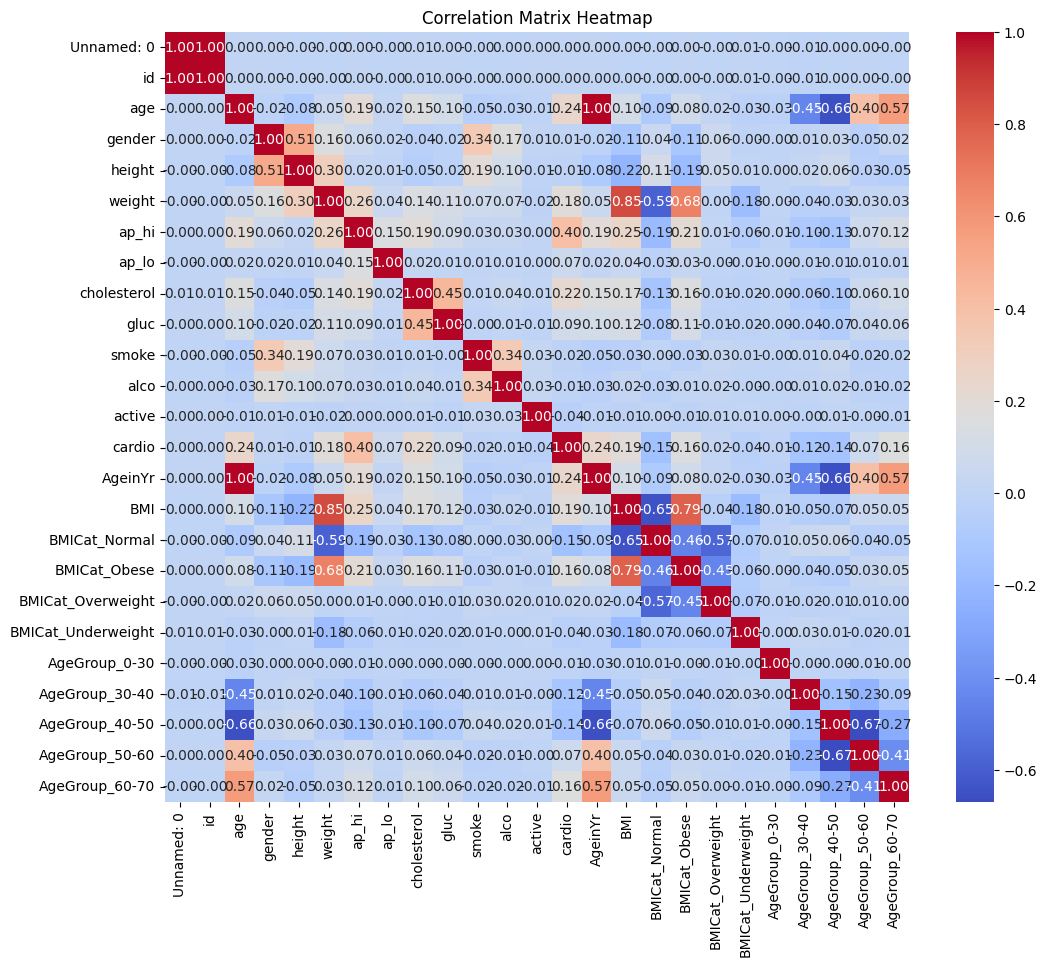

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設你的數據框名為df3
# df3 = pd.read_csv('your_data.csv')  # 如果你的數據是從CSV文件讀取的
df3 = pd.get_dummies(df2, columns=['BMICat', 'AgeGroup','bp_status', 'cholesterol_status', 'glucose_status'])

# 排除不需要的欄位
columns_to_exclude = ['bp_status_低血壓', 'bp_status_正常', 'bp_status_高血壓', 'cholesterol_status_偏高', 'cholesterol_status_正常', 'glucose_status_正常', 'glucose_status_高血糖']
df_filtered = df3.drop(columns=columns_to_exclude)

# 計算相關矩陣
correlation_matrix = df_filtered.corr()

# 使用 seaborn 生成熱力圖
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


  File "c:\Users\huang\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Logistic Regression: Accuracy = 0.73
Confusion Matrix for Logistic Regression:
[[5511 1496]
 [2291 4688]]

K-Nearest Neighbors: Accuracy = 0.69
Confusion Matrix for K-Nearest Neighbors:
[[4884 2123]
 [2266 4713]]

Decision Tree: Accuracy = 0.73
Confusion Matrix for Decision Tree:
[[5608 1399]
 [2317 4662]]

Random Forest: Accuracy = 0.73
Confusion Matrix for Random Forest:
[[5293 1714]
 [2110 4869]]

Gradient Boosting: Accuracy = 0.74
Confusion Matrix for Gradient Boosting:
[[5486 1521]
 [2128 4851]]

XGBoost: Accuracy = 0.73
Confusion Matrix for XGBoost:
[[5450 1557]
 [2198 4781]]

Naive Bayes: Accuracy = 0.58
Confusion Matrix for Naive Bayes:
[[1584 5423]
 [ 417 6562]]



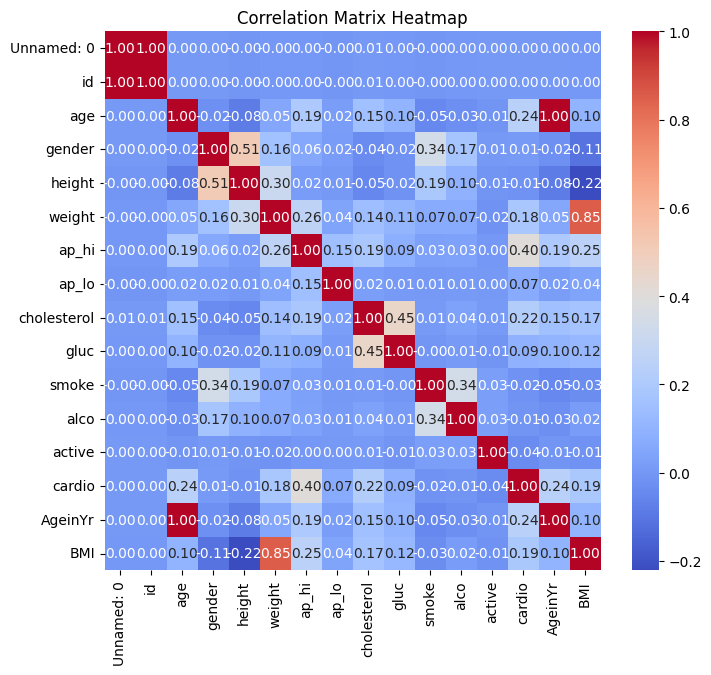

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# 假設你的數據框名為df2，首先對 'BMICat' 和 'AgeGroup' 進行獨熱編碼
df3 = pd.get_dummies(df2, columns=['BMICat', 'AgeGroup', 'bp_status', 'cholesterol_status', 'glucose_status'])

# 分割數據集為訓練集和測試集
X = df3.drop('cardio', axis=1)  # 特徵
y = df3['cardio']  # 目標變數
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化模型
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

# 訓練和評估模型
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # 注意使用標準化的數據
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    conf_mat = confusion_matrix(y_test, predictions)
    results[name] = accuracy
    conf_matrices[name] = conf_mat

# 打印結果
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(f"Confusion Matrix for {name}:\n{conf_matrices[name]}\n")

# 計算相關矩陣
# 排除不需要的欄位
columns_to_exclude = ['bp_status_低血壓', 'bp_status_正常', 'bp_status_高血壓', 'cholesterol_status_偏高', 'cholesterol_status_正常', 'glucose_status_正常', 'glucose_status_高血糖']
df_filtered = df3.drop(columns=columns_to_exclude)

# 只保留數值型欄位
numeric_df_filtered = df_filtered.select_dtypes(include=['float64', 'int64'])

# 計算相關矩陣
correlation_matrix = numeric_df_filtered.corr()

# 使用 seaborn 生成熱力圖
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# 假設你的數據框名為df2，首先對 'BMICat' 和 'AgeGroup' 進行獨熱編碼
df3 = pd.get_dummies(df2, columns=['BMICat', 'AgeGroup', 'bp_status', 'cholesterol_status', 'glucose_status'])

# 刪除 'weight' 和 'height' 欄位
df3 = df3.drop(columns=['weight', 'height'])

# 分割數據集為訓練集和測試集
X = df3.drop('cardio', axis=1)  # 特徵
y = df3['cardio']  # 目標變數
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化模型
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

# 訓練和評估模型
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # 注意使用標準化的數據
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    conf_mat = confusion_matrix(y_test, predictions)
    results[name] = accuracy
    conf_matrices[name] = conf_mat

# 打印結果
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(f"Confusion Matrix for {name}:\n{conf_matrices[name]}\n")

# 排除不需要的欄位
columns_to_exclude = ['bp_status_低血壓', 'bp_status_正常', 'bp_status_高血壓', 'cholesterol_status_偏高', 'cholesterol_status_正常', 'glucose_status_正常', 'glucose_status_高血糖']
df_filtered = df3.drop(columns=columns_to_exclude)

# 只保留數值型欄位
numeric_df_filtered = df_filtered.select_dtypes(include=['float64', 'int64'])

# 計算相關矩陣
correlation_matrix = numeric_df_filtered.corr()

# 使用 seaborn 生成熱力圖
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()
